# Mega Case Study - Make a Hybrid Deep Learning Map

## Install MiniSom Package

In [7]:
!pip install MiniSom

## Part 1 - Identify the Frauds with the Self-Organizing Map

### Importing the Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [9]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

### Training the SOM

In [12]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

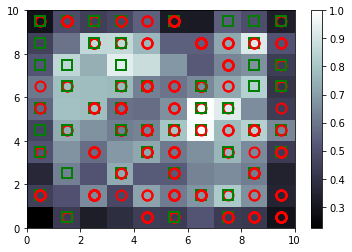

In [15]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [17]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### Printing the Fraud Clients

In [18]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15767729
15711446
15596797
15600975
15787693
15688210
15704509
15592914
15793366
15611973
15623668
15735106
15688059
15646521
15660263
15683276
15652289
15768777
15791326
15615670
15779586
15730150
15662854
15745375
15638983
15623210
15734578
15570508
15627328
15617991
15750545
15641007
15665014


## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Create Matrix of Features

In [19]:
customers = dataset.iloc[:, 1:].values

### Create Dependent Variable

In [20]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part 3 - ANN

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

## Import TensorFlow

In [22]:
import tensorflow as tf
tf.__version__

'2.8.0'

## Initializing the ANN

In [23]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [24]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [25]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [28]:
ann.fit(customers, is_fraud, batch_size=1, epochs=10)

Epoch 1/10
690/690 [==============================] - 3s 3ms/step - loss: 0.4029 - accuracy: 0.9493
Epoch 2/10
690/690 [==============================] - 2s 3ms/step - loss: 0.2317 - accuracy: 0.9522
Epoch 3/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1809 - accuracy: 0.9522
Epoch 4/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1599 - accuracy: 0.9522
Epoch 5/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1464 - accuracy: 0.9522
Epoch 6/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1374 - accuracy: 0.9522
Epoch 7/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1310 - accuracy: 0.9522
Epoch 8/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1261 - accuracy: 0.9522
Epoch 9/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1231 - accuracy: 0.9522
Epoch 10/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1202 - accuracy: 0.9522

### Predicting test set results

In [29]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [30]:
print(y_pred)

[[1.57901130e+07 7.10511597e-12]
 [1.55775150e+07 7.52374660e-08]
 [1.56674600e+07 8.35585681e-08]
 ...
 [1.57486490e+07 2.52668053e-01]
 [1.57795860e+07 2.52668053e-01]
 [1.56389830e+07 2.52668053e-01]]
